# Battery SOH Distribution & Correlation Analysis
**Prepared by:** Mohit Gajula

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# If CSV available:
#df = pd.read_csv("notebooks/cleaned_pulsebat.csv")  # or correct path

df = pd.read_csv("cleaned_pulsebat.csv") #readCsvFile

print(df.head())


   Mat  No.      ID   Qn       Q  Pt  SOC       SOE        U1        U2  ...  \
0  NMC    1  D3-100  2.1  1.9155   5    5  4.560714  0.002553  0.012529  ...   
1  NMC    2  D3-200  2.1  1.8499   5    5  4.404524  0.006596  0.007220  ...   
2  NMC    3  D3-300  2.1  1.8004   5    5  4.286667  0.002553  0.000000  ...   
3  NMC    4  D3-400  2.1  1.7452   5    5  4.155238  0.011064  0.015078  ...   
4  NMC    5  D3-500  2.1  1.6421   5    5  3.909762  0.028298  0.031642  ...   

        U13       U14       U15       U16       U17       U18       U19  \
0  0.001914  0.015720  0.048433  0.050809  0.002769  0.034643  0.010159   
1  0.007229  0.015720  0.028534  0.037825  0.005965  0.046472  0.045948   
2  0.002552  0.005869  0.026281  0.037260  0.001917  0.019645  0.046640   
3  0.011907  0.017606  0.015206  0.021641  0.010013  0.045839  0.077349   
4  0.028918  0.045483  0.020462  0.029733  0.027695  0.039290  0.112445   

        U20       U21       SOH  
0  0.011980  0.002552  0.912143  


## SOH Histogram

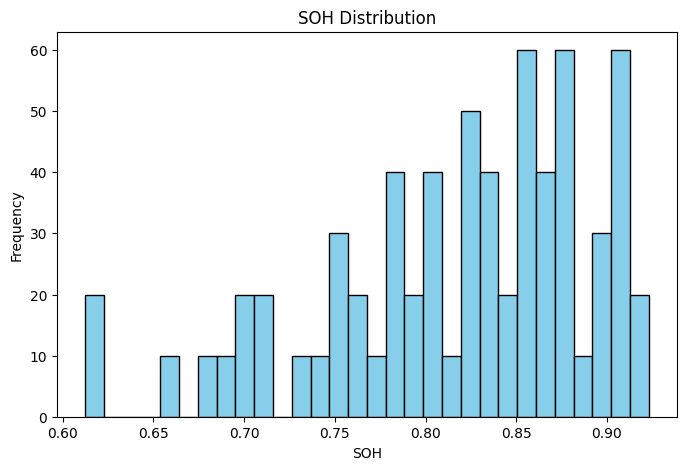

In [2]:
plt.figure(figsize=(8,5))
plt.hist(df['SOH'], bins=30, color='skyblue', edgecolor='black')
plt.title('SOH Distribution')
plt.xlabel('SOH')
plt.ylabel('Frequency')
plt.savefig('soh_histogram.png')
plt.show()

## SOH BoxPlot

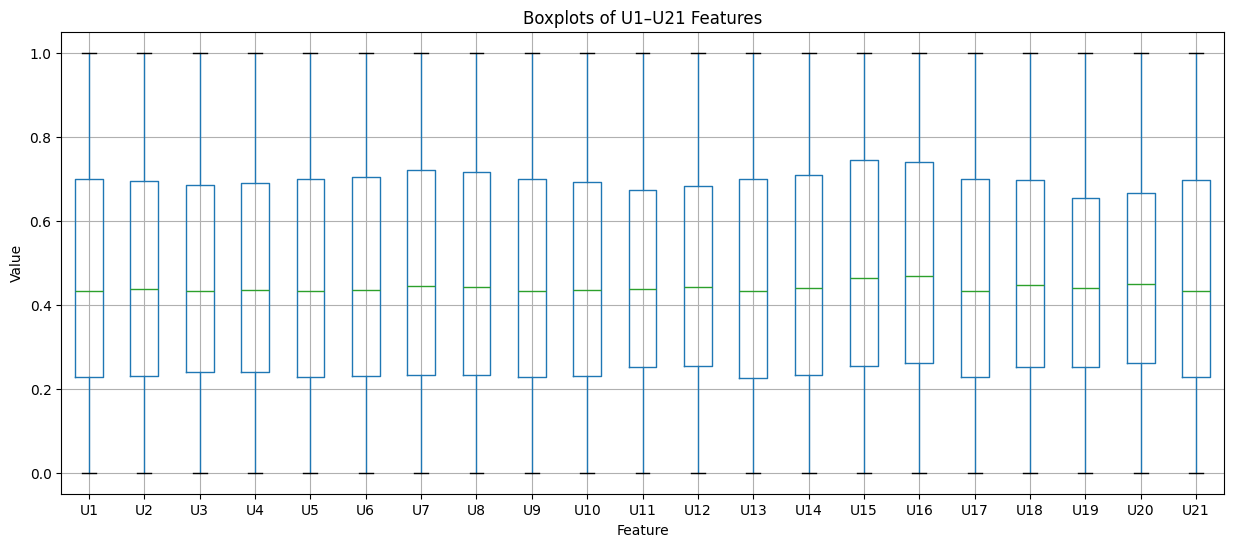

In [4]:
plt.figure(figsize=(15,6))
df.boxplot(column=[f'U{i}' for i in range(1,22)])
plt.title('Boxplots of U1–U21 Features')
plt.xlabel('Feature')
plt.ylabel('Value')
plt.savefig('u1_u21_boxplots.png')
plt.show()

# Correlation Block

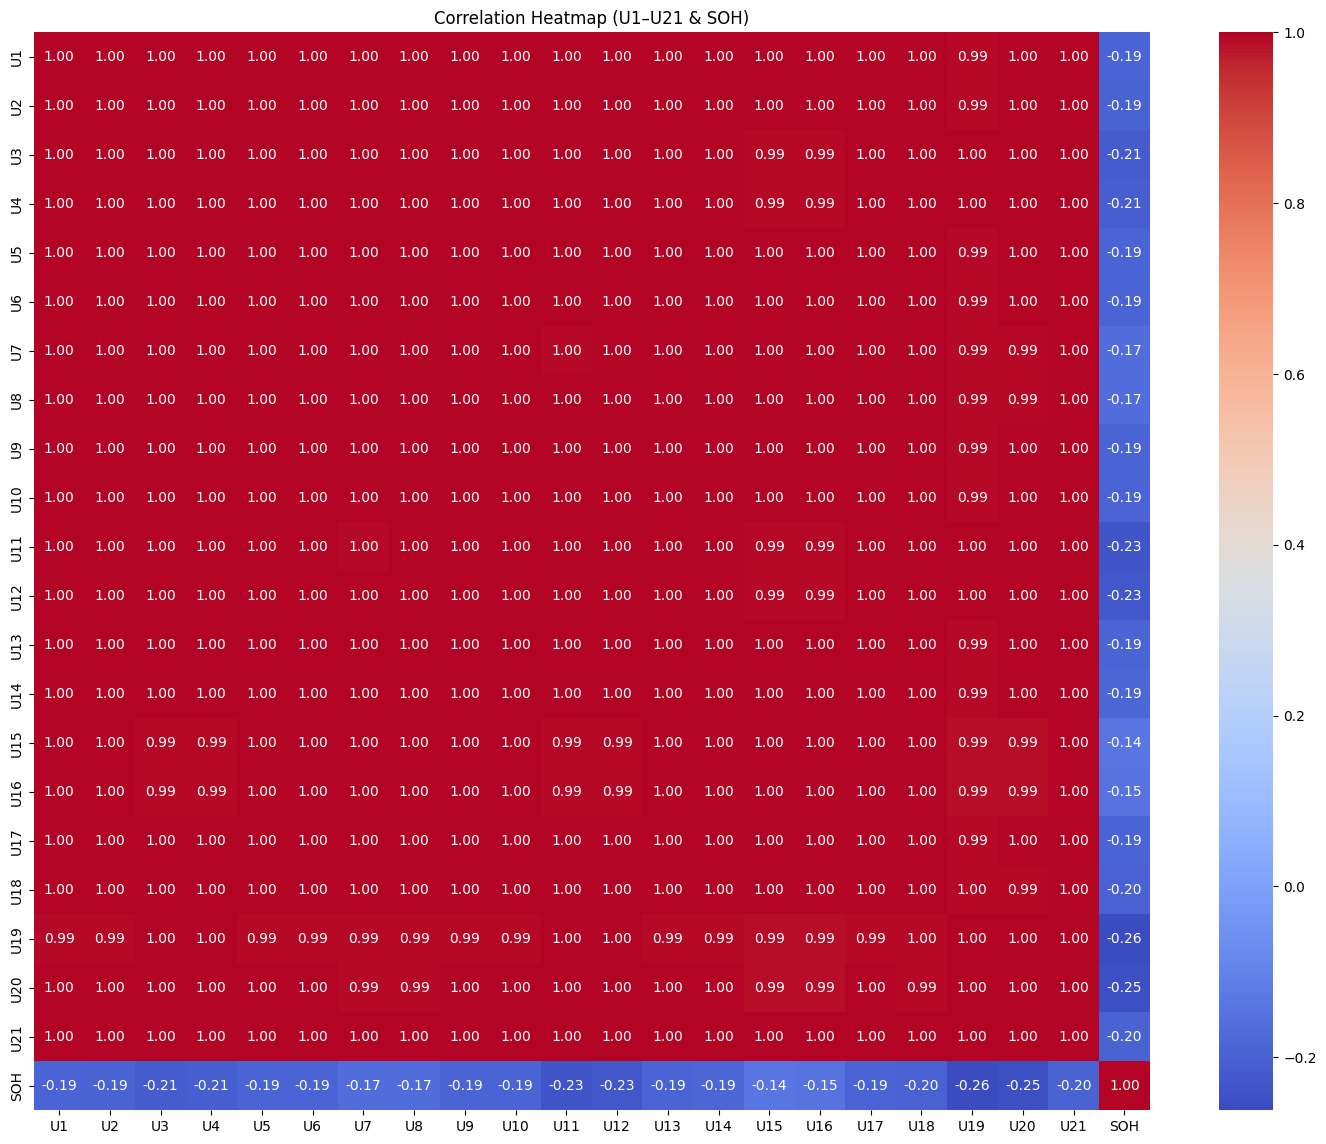

In [3]:
# Select only numeric columns for correlation
numeric_cols = [f'U{i}' for i in range(1,22)] + ['SOH']
corr = df[numeric_cols].corr()

plt.figure(figsize=(18,14))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap (U1–U21 & SOH)')
plt.savefig('correlation_heatmap.png')
plt.show()
